# Boolean generator 1 (version 1):

Generating sentences of the form

- 1) **A, not A** (contradiction)
- 2) **not A, A** (contradiction)
- 3) **A, not B** (non-contradiction)
- 4) ** not B, A ** (non-contradiction)



In [1]:
import numpy as np
import pandas as pd
from word_lists import name_list, positive_personality_list, condition_list
import os
import inspect
import sys
import itertools

almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions import plot_histogram_from_labels # noqa

% matplotlib inline


### Generating all types of propositions

### - 1) **A, not A** (contradiction)

In [2]:
template1 = itertools.product(name_list, positive_personality_list)
template1 = list(template1)
all_sentences_1 = ["{} is {}, {} is not {}".format(car,cdr,car,cdr) for car, cdr in template1]
all_sentences_1 = [sentence.split(",") + [1] for sentence in all_sentences_1]
np.random.shuffle(all_sentences_1)

print("Type 1 sentences:\n")
for sentence in all_sentences_1[0:10]:
    print(sentence)

Type 1 sentences:

['Finesse is obedient', ' Finesse is not obedient', 1]
['Speck is obedient', ' Speck is not obedient', 1]
['Sylvester is happy', ' Sylvester is not happy', 1]
['Silver is wonderful', ' Silver is not wonderful', 1]
['Kimberly is eager', ' Kimberly is not eager', 1]
['Oswin is wonderful', ' Oswin is not wonderful', 1]
['Moxie is aggressive', ' Moxie is not aggressive', 1]
['Henrietta is delightful', ' Henrietta is not delightful', 1]
['Ford is jolly', ' Ford is not jolly', 1]
['Hugh is agreeable', ' Hugh is not agreeable', 1]


### - 2) **not A, A** (contradiction)

In [3]:
template2 = itertools.product(name_list,condition_list)
template2 = list(template2)
all_sentences_2 = ["{} is not {}, {} is {}".format(car,cdr,car,cdr) for car, cdr in template2]
all_sentences_2 = [sentence.split(",") + [1] for sentence in all_sentences_2]
np.random.shuffle(all_sentences_2)

print("Type 2 sentences:\n")
for sentence in all_sentences_2[0:10]:
    print(sentence)

Type 2 sentences:

['Bear is not helpful', ' Bear is helpful', 1]
['Kendall is not powerful', ' Kendall is powerful', 1]
['Rekker is not tender', ' Rekker is tender', 1]
['Fairbanks is not uninterested', ' Fairbanks is uninterested', 1]
['Chaucer is not famous', ' Chaucer is famous', 1]
['Gracelynn is not inexpensive', ' Gracelynn is inexpensive', 1]
['Marvel is not dead', ' Marvel is dead', 1]
['Kingston is not vast', ' Kingston is vast', 1]
['Newt is not powerful', ' Newt is powerful', 1]
['Tyson is not famous', ' Tyson is famous', 1]


### - 3) **A, not B** (non-contradiction)

In [4]:
template_triple = itertools.product(name_list, positive_personality_list, condition_list)
template_triple = list(template_triple)
all_sentences_3 = ["{} is {}, {} is not {}".format(car,cdr,car,cddr) for car, cdr, cddr in template_triple]

np.random.shuffle(template_triple)

template3 = template_triple[0:2750]

all_sentences_3 = []

for triple in template3:
    new_name = triple[0]
    while new_name == triple[0]:
        i = np.random.choice(len(name_list))
        new_name = name_list[i]
    car, cdr, cddr = triple 
    all_sentences_3.append("{} is {}, {} is not {}".format(car,cdr,new_name,cddr))

all_sentences_3 = [ sentence.split(",") + [0] for sentence in all_sentences_3]    
    
np.random.shuffle(all_sentences_3)

print("Type 3 sentences:\n")
for sentence in all_sentences_3[0:10]:
    print(sentence)

Type 3 sentences:

['Blaze is kind', ' Clinton is not alive', 0]
['Dean is polite', ' Paige is not helpful', 0]
['Georgiana is calm', ' Merton is not inexpensive', 0]
['Cranston is eager', ' Brown is not uninterested', 0]
['Vane is victorious', ' Roberta is not gifted', 0]
['Bridger is victorious', ' Prentice is not poor', 0]
['Auberon is proud', ' Sherwood is not easy', 0]
['Rayburn is agreeable', ' Tolliver is not hallowed', 0]
['Burl is calm', ' Olive is not unimportant', 0]
['Ned is lively', ' Whistler is not mushy', 0]


### - 4) ** not B, A ** (non-contradiction)

In [5]:
np.random.shuffle(template_triple)

template4 = template_triple[0:2750]

all_sentences_4 = []

for triple in template4:
    new_name = triple[0]
    while new_name == triple[0]:
        i = np.random.choice(len(name_list))
        new_name = name_list[i]
    car, cdr, cddr = triple 
    all_sentences_4.append("{} is not {}, {} is {}".format(car,cdr,new_name,cddr))

all_sentences_4 = [ sentence.split(",") + [0] for sentence in all_sentences_4]    
    
np.random.shuffle(all_sentences_4)

print("Type 4 sentences:\n")
for sentence in all_sentences_4[0:10]:
    print(sentence)

Type 4 sentences:

['Truman is not ambitious', ' Braydon is alive', 0]
['Quixley is not aggressive', ' Libby is wrong', 0]
['Dallin is not jolly', ' Brook is inexpensive', 0]
['Baker is not nice', ' Leland is gifted', 0]
['Dina is not aggressive', ' Harriet is hallowed', 0]
['Joan is not happy', ' Loyal is gifted', 0]
['Tessie is not gentle', ' Tyler is hallowed', 0]
['Draper is not eager', ' Huffington is easy', 0]
['Nate is not proud', ' Chaucer is mushy', 0]
['Creighton is not thankful', ' Cade is tender', 0]


In [6]:
np.random.shuffle(all_sentences_1)
np.random.shuffle(all_sentences_2)
np.random.shuffle(all_sentences_3)
np.random.shuffle(all_sentences_4)

all_sentences_1 = all_sentences_1[0:2750]
all_sentences_2 = all_sentences_2[0:2750]


size1 = len(all_sentences_1)
size2 = len(all_sentences_2)
size3 = len(all_sentences_3)
size4 = len(all_sentences_4)

all_sentences = all_sentences_1 + all_sentences_2 + all_sentences_3 + all_sentences_4


size = len(all_sentences)

print("type 1 size = {}".format(size1))
print("type 2 size = {}".format(size2))
print("type 3 size = {}".format(size3))
print("type 4 size = {}".format(size4))
print("total size = {}".format(size))

type 1 size = 2750
type 2 size = 2750
type 3 size = 2750
type 4 size = 2750
total size = 11000


### Generating a train DataFrame with 10000 examples and a test DataFrame with 1000 examples 

In [7]:
sentence_1 = [triple[0] for triple in all_sentences]
sentence_2 = [triple[1] for triple in all_sentences]
label = [triple[2] for triple in all_sentences]

df_dict = {"sentence1": sentence_1,
           "sentence2": sentence_2,
           "label": label}
        
df = pd.DataFrame(df_dict)
df = df[["sentence1", "sentence2", "label"]]
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:10000]
df_test = df.iloc[10000:]

df.tail()

,sentence1,sentence2,label
10995,Lindsay is lively,Verve is not tender,0
10996,Harper is jolly,Beckett is not shy,0
10997,Nat is ambitious,Nat is not ambitious,1
10998,Darrow is eager,Darrow is not eager,1
10999,Blues is not wonderful,Grover is mealy,0


#### Looking at the label distribution

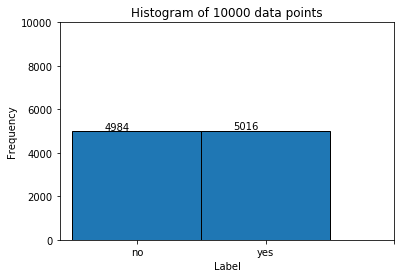

In [8]:
train_label = df_train["label"].values
plot_histogram_from_labels(train_label, ["no", "yes"], "b1_train.png")

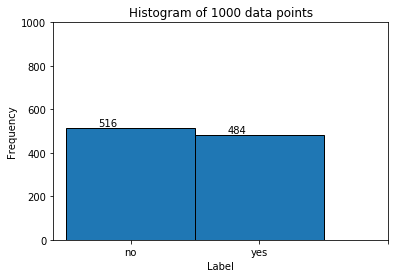

In [9]:
test_label = df_test["label"].values
plot_histogram_from_labels(test_label, ["no", "yes"], "b1_test.png")

### Saving to CSV

In [10]:
df_train.to_csv("b1_v1_train.csv", index=False)
df_test.to_csv("b1_v1_test.csv", index=False)